<a href="https://colab.research.google.com/github/iamBehzad/Streamlit-ChurnModel-Classification/blob/main/PyCaret_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install pycaret

In [2]:
import pandas as pd 
from pycaret.classification import *

In [3]:
df = pd.read_csv('Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
classification_setup = setup(data= df, target='Exited',remove_outliers=True,normalize=True,normalize_method='robust',
                            ignore_features= ['RowNumber','CustomerId','Surname'], silent = True,session_id = None,fix_imbalance=True,fold_shuffle=True)

,Description,Value
0,session_id,3899
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                ('rem_outliers',
                 Outlier(contamination=0.05, methods=['pc

In [5]:
compare_models(exclude = ['lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8496,0.8302,0.4937,0.5915,0.5368,0.4481,0.4515,0.376
rf,Random Forest Classifier,0.8473,0.8290,0.5030,0.5790,0.5380,0.4472,0.4489,1.959
et,Extra Trees Classifier,0.8371,0.8072,0.4233,0.5487,0.4771,0.3829,0.3877,1.547
gbc,Gradient Boosting Classifier,0.8323,0.8362,0.5889,0.5255,0.5547,0.4520,0.4535,1.964
dummy,Dummy Classifier,0.8230,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.068
ada,Ada Boost Classifier,0.8000,0.8142,0.6271,0.4547,0.5264,0.4039,0.4128,0.520
dt,Decision Tree Classifier,0.7822,0.6663,0.4868,0.4052,0.4419,0.3082,0.3104,0.235
lr,Logistic Regression,0.7466,0.8104,0.7274,0.3859,0.5041,0.3549,0.3871,1.017
ridge,Ridge Classifier,0.7425,0.0000,0.7333,0.3820,0.5021,0.3511,0.3851,0.156
svm,SVM - Linear Kernel,0.7400,0.0000,0.7180,0.3811,0.4960,0.3439,0.3762,0.229


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3899, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3899, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

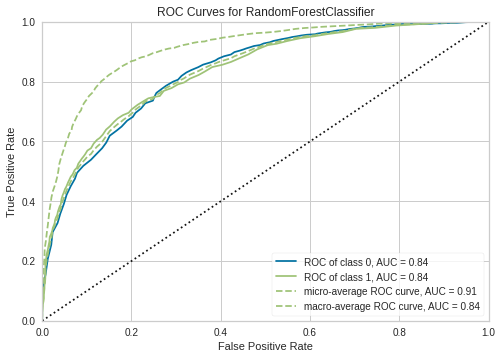

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [7]:
rf = create_model('rf')


plot_model(estimator = rf, plot = 'auc')

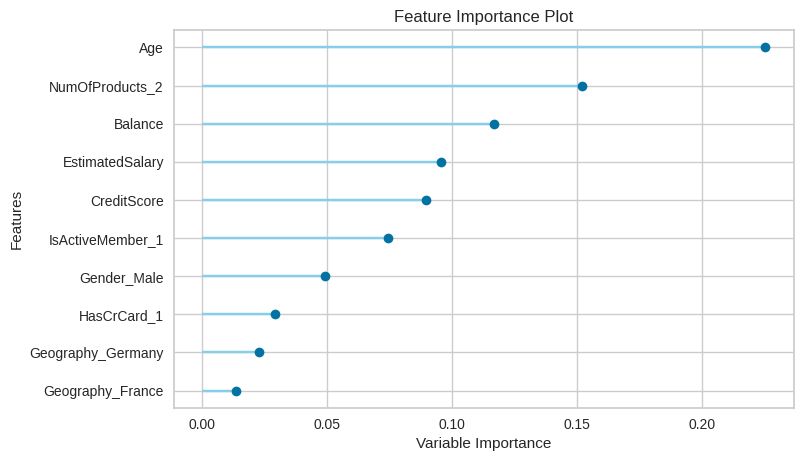

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [8]:
plot_model(estimator = rf, plot = 'feature')

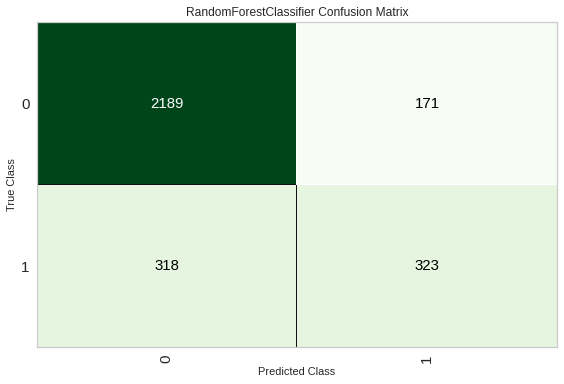

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [9]:
plot_model(estimator = rf, plot = 'confusion_matrix')

In [11]:
evaluate_model(rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3899, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [10]:
lightgbm = create_model('lightgbm')
et = create_model('et')
gbc = create_model('gbc')
dummy = create_model('dummy')
ada= create_model('ada')
dt = create_model('dt')
lr = create_model('lr')
ridge = create_model('ridge')
svm = create_model('svm')
knn = create_model('knn')
nb = create_model('nb')
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1759,0.5,1.0,0.1759,0.2992,0.0,0.0
1,0.1759,0.5,1.0,0.1759,0.2992,0.0,0.0
2,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0
3,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0
4,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0
5,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0
6,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0
7,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0
8,0.1774,0.5,1.0,0.1774,0.3014,0.0,0.0


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 15
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [14]:
save_model(lightgbm,'Light Gradient Boosting Machine')
save_model(rf,'Random Forest Classifier')
save_model(et,'Extra Trees Classifier')
save_model(gbc,'Gradient Boosting Classifier')
save_model(dummy,'Dummy Classifier')
save_model(dt,'Decision Tree Classifier')
save_model(ada,'Ada Boost Classifier')
save_model(lr,'Logistic Regression')
save_model(ridge,'Ridge Classifier')
save_model(svm,'SVM - Linear Kernel')
save_model(knn,'K Neighbors Classifier')
save_model(nb,'Naive Bayes')
save_model(qda,'Quadratic Discriminant Analysis')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3899, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Light Gradient Boosting Machine, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_colu

Transformation Pipeline and Model Successfully Saved


INFO:logs:Random Forest Classifier.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_we

Transformation Pipeline and Model Successfully Saved


INFO:logs:Extra Trees Classifier.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=

Transformation Pipeline and Model Successfully Saved


INFO:logs:Gradient Boosting Classifier.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                                            learning_rate=0.1, loss='deviance',
                                   

Transformation Pipeline and Model Successfully Saved


INFO:logs:Dummy Classifier.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                         target='Exited')),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(t

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                     

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3899,
                solver='auto', tol=0.001), model_name=Ridge Classifier, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(catego

Transformation Pipeline and Model Successfully Saved


INFO:logs:SVM - Linear Kernel.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                ('fix_perfect', Remove_100(target='Exited')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['RowNumber',
                                                        'CustomerId',
                                                        'Surname'],
                                       id_columns=['RowNumber'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorica...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Exited')),
                 ('fix_perfect', Remove_100(target='Exited')),
                 ('clea

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3899, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Logistic Regression, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[],

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['RowNumber',
                                                        'CustomerId',
                                                        'Surname'],
                                       id_columns=['RowNumber'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorica...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
       